In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
COLORS = {
    'bg': '#F2E6D0',
    'fg': '#011526',
    'fg_faded': '#97A69B',
    'accent0': '#03738C',
    'accent1': '#D97904',
    'accent2': '#E6D0c0'
}

In [18]:
df_characters = pd.read_csv('data/aa_characters.csv')
df_games = pd.read_csv('data/aa_games.csv', parse_dates=['release_date_earliest', 'release_date_collection'], dayfirst=True)
df_cases = pd.read_csv('data/aa_cases.csv', parse_dates=['event_date_low', 'event_date_high'], dayfirst=True)
df_characters

,id,full_name,fan_full_name,display_name,fan_display_name,gender,nationality,birth_year_low,birth_year_high,death_year_low,death_year_high,alive,height_cm,debut_game,games,debut_case,offspring_count,kill_count
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,"PW_AA, AAI2",1-1,0,1
1,1,Cindy Stone,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,2016.0,2016.0,False,169.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,"PW_AA, PW_JFA, PW_TT, AJ_AA, AAI, AAI2, PL_VS_...",1-1,0,0
3,3,Mia Fey,NaN,Mia,NaN,FEMALE,United States,1989.0,1989.0,2016.0,2016.0,False,168.0,PW_AA,"PW_AA, PW_TT",1-1,0,0
4,4,Larry Butz,NaN,Butz,NaN,MALE,United States,1993.0,1994.0,NaN,NaN,True,177.0,PW_AA,"PW_AA, PW_JFA, PW_TT, AAI, AAI2",1-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,Jabez,NaN,NaN,NaN,MALE,United Kingdom,NaN,NaN,NaN,NaN,True,NaN,TGAA2,TGAA2,G2-4,0,0
361,361,Venus,NaN,NaN,NaN,FEMALE,United Kingdom,NaN,NaN,NaN,NaN,True,NaN,TGAA2,TGAA2,G2-4,0,0
362,362,Lady Baskerville,NaN,NaN,NaN,FEMALE,United Kingdom,NaN,NaN,1892.0,1892.0,False,NaN,TGAA2,TGAA2,G2-5,1,0
363,363,Ayame Mikotoba,NaN,NaN,NaN,FEMALE,Japan,NaN,NaN,1886.0,1886.0,False,NaN,TGAA2,TGAA2,G2-5,1,0


In [19]:
def mask_outliers(arr: np.ndarray) -> np.ndarray:
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    outlier_mask = (arr < q1 - 1.5 * iqr) & (arr > q3 + 1.5 * iqr)
    return outlier_mask

def rgb_from_hex_code(hex_code: str) -> tuple[float, float, float]:
    hex_code = hex_code.lstrip('#')
    r = int(hex_code[0:2], 16) / 255
    g = int(hex_code[2:4], 16) / 255
    b = int(hex_code[4:6], 16) / 255
    return r, g, b

def parse_str_list(string: str, delimiter: str = ',', do_strip: bool = True) -> list[str]:
    return [s.strip() if do_strip else s for s in string.split(delimiter)]

In [20]:
df_characters_viz = df_characters.copy()
df_characters_viz['games'] = df_characters_viz['games'].map(parse_str_list)
df_characters_viz = df_characters_viz.explode('games')
df_characters_viz

,id,full_name,fan_full_name,display_name,fan_display_name,gender,nationality,birth_year_low,birth_year_high,death_year_low,death_year_high,alive,height_cm,debut_game,games,debut_case,offspring_count,kill_count
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,PW_AA,1-1,0,1
0,0,Frank Sahwit,NaN,Sahwit,NaN,MALE,United States,1972.0,1972.0,NaN,NaN,True,166.0,PW_AA,AAI2,1-1,0,1
1,1,Cindy Stone,NaN,NaN,NaN,FEMALE,United States,1994.0,1994.0,2016.0,2016.0,False,169.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,PW_AA,1-1,0,0
2,2,Phoenix Wright,NaN,Phoenix,NaN,MALE,United States,1992.0,1993.0,NaN,NaN,True,176.0,PW_AA,PW_JFA,1-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,360,Jabez,NaN,NaN,NaN,MALE,United Kingdom,NaN,NaN,NaN,NaN,True,NaN,TGAA2,TGAA2,G2-4,0,0
361,361,Venus,NaN,NaN,NaN,FEMALE,United Kingdom,NaN,NaN,NaN,NaN,True,NaN,TGAA2,TGAA2,G2-4,0,0
362,362,Lady Baskerville,NaN,NaN,NaN,FEMALE,United Kingdom,NaN,NaN,1892.0,1892.0,False,NaN,TGAA2,TGAA2,G2-5,1,0
363,363,Ayame Mikotoba,NaN,NaN,NaN,FEMALE,Japan,NaN,NaN,1886.0,1886.0,False,NaN,TGAA2,TGAA2,G2-5,1,0


In [21]:
df_characters_viz.shape[0]

486

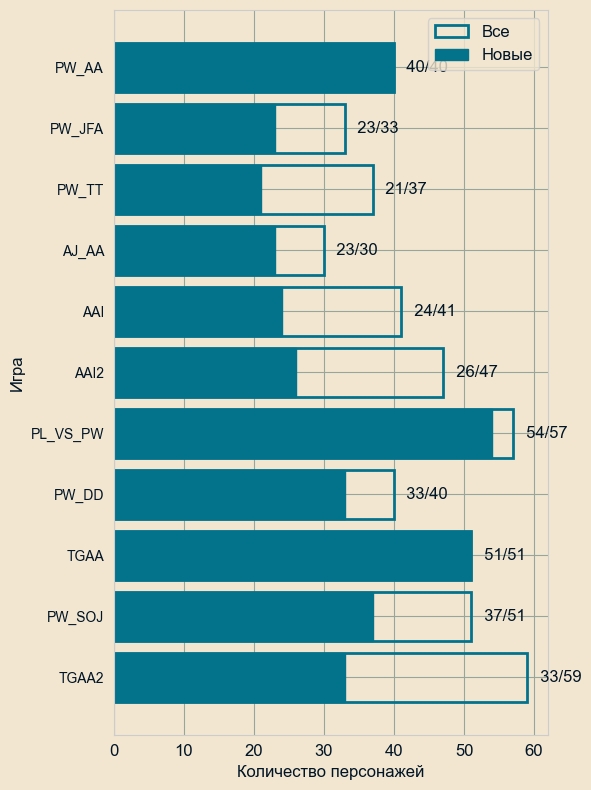

Character Distribution by Game:
    game  new_count  recurring_count  total_count
   TGAA2         33               26           59
  PW_SOJ         37               14           51
    TGAA         51                0           51
   PW_DD         33                7           40
PL_VS_PW         54                3           57
    AAI2         26               21           47
     AAI         24               17           41
   AJ_AA         23                7           30
   PW_TT         21               16           37
  PW_JFA         23               10           33
   PW_AA         40                0           40


In [22]:
plt.rcParams['figure.facecolor'] = COLORS['bg']  # Off-white background
plt.rcParams['axes.facecolor'] = COLORS['bg']
plt.rcParams['text.color'] = COLORS['fg']        # Dark blue text
plt.rcParams['axes.labelcolor'] = COLORS['fg']
plt.rcParams['xtick.color'] = COLORS['fg']
plt.rcParams['ytick.color'] = COLORS['fg']
# Set grid properties globally using rcParams
plt.rcParams['grid.color'] = COLORS['fg_faded']  # Light gray color

# First, let's get the game release order
game_order = df_games.sort_values('release_date_earliest')['acronym'].tolist()

# Prepare the data for visualization
def calculate_character_types(df_characters_viz, game_order):
    results = []

    for game in game_order:
        # Characters who debuted in this game (NEW)
        new_chars = df_characters_viz[
            (df_characters_viz['debut_game'] == game) &
            (df_characters_viz['games'] == game)
            ]

        # All characters appearing in this game (TOTAL = NEW + RECURRING)
        total_chars = df_characters_viz[df_characters_viz['games'] == game]

        # Recurring characters (appear in this game but debuted earlier)
        recurring_chars = total_chars[total_chars['debut_game'] != game]

        results.append({
            'game': game,
            'new_count': len(new_chars),
            'recurring_count': len(recurring_chars),
            'total_count': len(total_chars)
        })

    return pd.DataFrame(results)

# Calculate the data
character_stats = calculate_character_types(df_characters_viz, game_order)
character_stats = character_stats.iloc[::-1]

# Create the horizontal bar plot
plt.figure(figsize=(6, 8))

# Set up the plot
games = character_stats['game']
y_pos = np.arange(len(games))

# Create the bars - total (outline) and new (filled)
plt.barh(y_pos, character_stats['total_count'],
         color='none', edgecolor=COLORS['accent0'], linewidth=2, label='Все')
plt.barh(y_pos, character_stats['new_count'],
         color=COLORS['accent0'], edgecolor=COLORS['accent0'], label='Новые')

# Customize the plot
plt.yticks(y_pos, games)
plt.xticks(fontsize=12)
plt.xlabel('Количество персонажей', fontsize=12)
plt.ylabel('Игра', fontsize=12)
plt.legend(fontsize=12)

# Add value labels
for i, (new, total) in enumerate(zip(character_stats['new_count'], character_stats['total_count'])):
    plt.text(total + 0.5, i, f'  {new}/{total}', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('characters_new_vs_recurring.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

# Print some stats
print("Character Distribution by Game:")
print(character_stats.to_string(index=False))

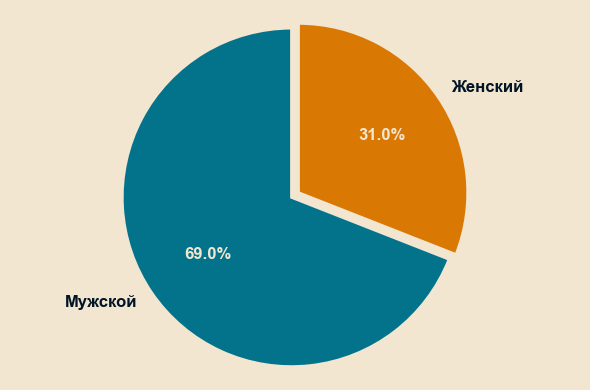

Gender Distribution:
gender
Мужской    252
Женский    113
Name: count, dtype: int64

Total characters: 365


In [23]:
df_characters_viz_2 = df_characters.copy()
gender_ru_remappings = {
    'MALE': 'Мужской',
    'FEMALE': 'Женский'
}
genders = df_characters_viz_2['gender']
genders = genders.map(lambda g: gender_ru_remappings[g])
gender_counts = genders.value_counts()

# Create pie chart with custom styling
plt.figure(figsize=(6, 4))

# Colors using your analogous harmony
colors = [COLORS['accent0'], COLORS['accent1']]  # Dark blue, Purple
explode = (0.05, 0)  # Slightly explode the first slice for emphasis

# Create pie chart
wedges, texts, autotexts = plt.pie(gender_counts.values,
                                   labels=gender_counts.index,
                                   autopct='%1.1f%%',
                                   colors=colors,
                                   explode=explode,
                                   startangle=90,
                                   textprops={'fontsize': 12, 'color': COLORS['fg']},
                                   wedgeprops={'edgecolor': COLORS['bg'], 'linewidth': 2})

# Customize the percentage labels
for autotext in autotexts:
    autotext.set_color(COLORS['bg'])  # White text on colored background
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Customize the main labels
for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

# Equal aspect ratio ensures the pie is circular
plt.axis('equal')

# Add background color
fig = plt.gcf()
fig.patch.set_facecolor(COLORS['bg'])

plt.tight_layout()
plt.savefig('gender_distribution_pie.svg',
            format='svg',
            transparent=True,
            bbox_inches='tight',
            dpi=300,
            facecolor=COLORS['bg'],
            edgecolor='none')
plt.show()

# Print the counts
print("Gender Distribution:")
print(gender_counts)
print(f"\nTotal characters: {gender_counts.sum()}")

In [24]:
df_characters_viz_3 = df_characters.copy()
heights = df_characters_viz_3['height_cm'].dropna()

heights_q1 = heights.quantile(0.25)
heights_q3 = heights.quantile(0.75)
iqr = heights_q3 - heights_q1

df_characters_viz_3['height_cm']

0      166.0
1      169.0
2      176.0
3      168.0
4      177.0
       ...  
360      NaN
361      NaN
362      NaN
363      NaN
364      NaN
Name: height_cm, Length: 365, dtype: float64

Total characters with height data: 175
Inliers: 173, Outliers: 2
(0.00392156862745098, 0.08235294117647059, 0.14901960784313725)


<Figure size 600x400 with 0 Axes>

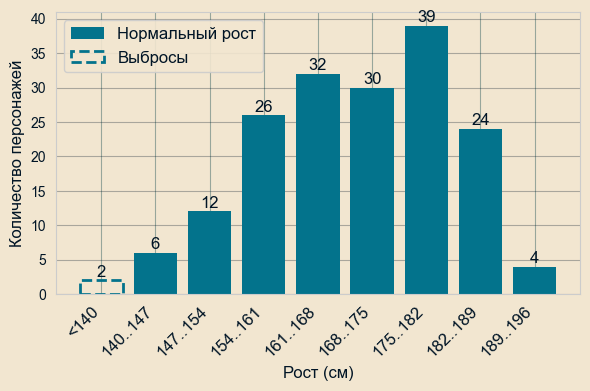


Height Statistics:
Min: 120.0 cm
Max: 196.0 cm
Mean: 168.5 cm
Median: 169.0 cm
Q1: 160.0 cm
Q3: 177.5 cm


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def mask_outliers(arr: np.ndarray) -> np.ndarray:
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    outlier_mask = (arr < q1 - 1.5 * iqr) | (arr > q3 + 1.5 * iqr)
    return outlier_mask

# Prepare the data
height_data = df_characters['height_cm'].dropna()
outlier_mask = mask_outliers(height_data.values)
inlier_data = height_data[~outlier_mask]
outlier_data = height_data[outlier_mask]

print(f"Total characters with height data: {len(height_data)}")
print(f"Inliers: {len(inlier_data)}, Outliers: {len(outlier_data)}")

# Determine bins using Sturges' rule for inliers
n_bins = int(np.floor(np.log2(len(inlier_data))) + 1)
inlier_min, inlier_max = inlier_data.min(), inlier_data.max()
bin_width = (inlier_max - inlier_min) / n_bins

# Create bin edges for inliers
inlier_bins = np.arange(inlier_min, inlier_max + bin_width, bin_width)

# Create the main plot
plt.figure(figsize=(6, 4))
fig, ax = plt.subplots(figsize=(6, 4))

# Plot inliers (filled bars)
inlier_heights, inlier_bin_edges = np.histogram(inlier_data, bins=inlier_bins)
inlier_bin_centers = (inlier_bin_edges[:-1] + inlier_bin_edges[1:]) / 2
inlier_bars = ax.bar(inlier_bin_centers, inlier_heights, 
                    width=bin_width * 0.8, color=COLORS['accent0'],
                    linewidth = 0,
                    label='Нормальный рост')

# Plot outliers if they exist
if len(outlier_data) > 0:
    # Separate low and high outliers
    low_outliers = outlier_data[outlier_data < inlier_min]
    high_outliers = outlier_data[outlier_data > inlier_max]
    
    # Create outlier bins
    outlier_bins = []
    outlier_labels = []
    outlier_counts = []
    
    # Low outlier bin
    if len(low_outliers) > 0:
        outlier_bins.append(inlier_min - bin_width/2)
        outlier_counts.append(len(low_outliers))
        outlier_labels.append(f'<{inlier_bin_edges[0]:.0f}')
    
    # High outlier bin
    if len(high_outliers) > 0:
        outlier_bins.append(inlier_max + bin_width/2)
        outlier_counts.append(len(high_outliers))
        outlier_labels.append(f'>{inlier_bin_edges[-2]:.0f}')
    
    # Plot outlier bars
    if outlier_bins:
        outlier_bars = ax.bar(outlier_bins, outlier_counts,
                             width=bin_width * 0.8,
                             color='none', edgecolor=COLORS['accent0'], 
                             linewidth=2, linestyle='--',
                             label='Выбросы')

print(rgb_from_hex_code(COLORS['fg']))
# Customize the plot
ax.set_xlabel('Рост (см)', color=COLORS['fg'], fontsize=12)
ax.set_ylabel('Количество персонажей', color=COLORS['fg'], fontsize=12)

# Create x-axis labels for inlier bins
inlier_labels = []
for i in range(len(inlier_bin_edges) - 1):
    low = inlier_bin_edges[i]
    high = inlier_bin_edges[i + 1]
    inlier_labels.append(f'{low:.0f}..{high:.0f}')

# Combine all x-axis labels and positions
all_labels = []
all_positions = []

if len(low_outliers) > 0:
    all_labels.append(outlier_labels[0])
    all_positions.append(inlier_min - bin_width/2)

all_labels.extend(inlier_labels)
all_positions.extend(inlier_bin_centers)

if len(high_outliers) > 0:
    outlier_idx = 1 if len(low_outliers) > 0 else 0
    all_labels.append(outlier_labels[outlier_idx])
    all_positions.append(inlier_max + bin_width/2)

# Set x-ticks
ax.set_xticks(all_positions)
ax.set_xticklabels(all_labels, rotation=45, ha='right', fontsize=12)

# Customize appearance
ax.tick_params(colors=COLORS['fg'])
ax.grid(True, axis='y', alpha=0.3, color=COLORS['fg'])
# Add legend
ax.legend(framealpha=0.9, labelcolor=COLORS['fg'], fontsize=12)

# Add value labels on bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Only label non-zero bars
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                f'{int(height)}', ha='center', va='bottom',
                color=COLORS['fg'], fontsize=12)

plt.tight_layout()
plt.savefig('height_distribution_outliers.svg', format='svg', transparent=True,
            bbox_inches='tight', dpi=300)
plt.show()

# Print statistics
print(f"\nHeight Statistics:")
print(f"Min: {height_data.min():.1f} cm")
print(f"Max: {height_data.max():.1f} cm")
print(f"Mean: {height_data.mean():.1f} cm")
print(f"Median: {height_data.median():.1f} cm")
print(f"Q1: {np.percentile(height_data, 25):.1f} cm")
print(f"Q3: {np.percentile(height_data, 75):.1f} cm")

In [26]:
top_n = 5
nationalities = df_characters_viz_3['nationality']
nationalities_vc = nationalities.value_counts()
nationalities_vc.iloc[:5]

nationality
United States     185
United Kingdom     66
Labyrinthia        43
Khura'in           18
Japan              16
Name: count, dtype: int64

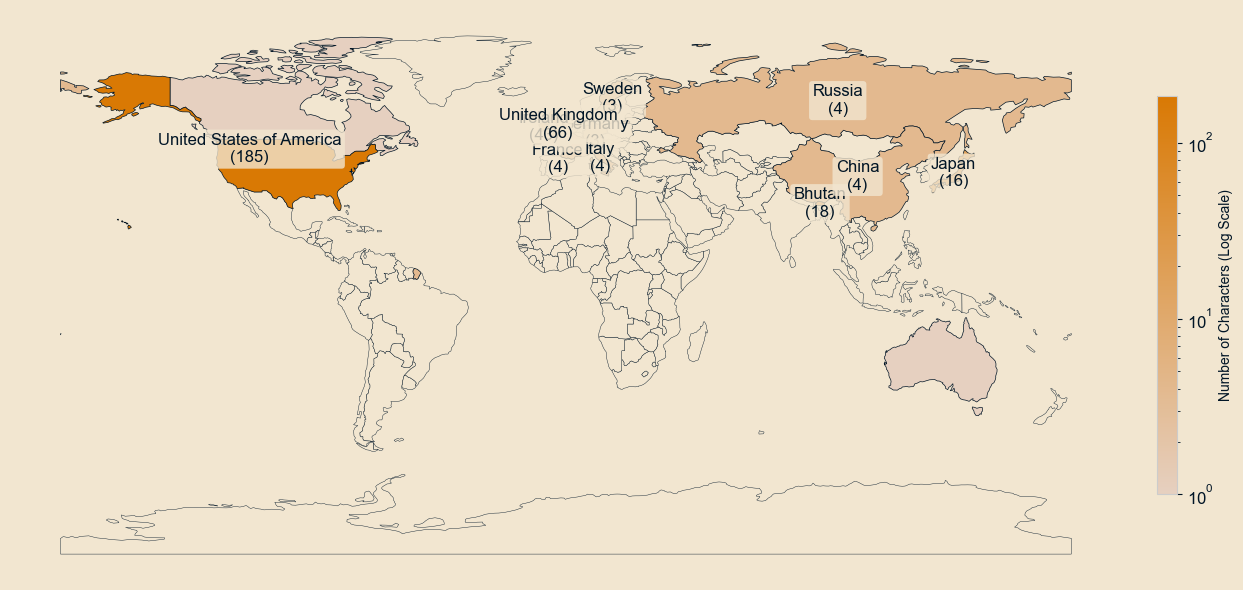

Nationality Statistics:
Countries with characters: 13
Countries without characters: 164
Total characters mapped: 352.0

Top 5 countries:
                    NAME  character_count
United States of America            185.0
          United Kingdom             66.0
                 Ireland             43.0
                  Bhutan             18.0
                   Japan             16.0


In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, LinearSegmentedColormap
import matplotlib.colors as colors

# Load world map data
world = gpd.read_file('data/ne_110m_admin_0_countries.shp')  # Update the path

# Create nationality mapping
country_mapping = {
    'United States': 'United States of America',
    'United Kingdom': 'United Kingdom',
    'Zheng Fa': 'China',
    'Labyrinthia': 'Ireland',
    'Borginia': 'Sweden',
    'Cohdopia': 'Czech Republic',
    "Khura'in": 'Bhutan',
    'Japan': 'Japan'
    # Add more mappings as needed
}

# Process nationality data
nationality_counts = df_characters['nationality'].dropna().value_counts().reset_index()
nationality_counts.columns = ['country', 'character_count']
nationality_counts['country'] = nationality_counts['country'].map(lambda k: country_mapping.get(k, k))

# Merge with world data
world_with_data = world.merge(nationality_counts,
                             left_on='NAME',      
                             right_on='country',
                             how='left')

# Fill NaN values with 0 for countries with no characters
world_with_data['character_count'] = world_with_data['character_count'].fillna(0)

# Create custom colormap
def create_custom_colormap():
    # Colors for your analogous harmony
    zero_color = COLORS['bg']  # Light gray for zero counts
    
    # Create a colormap from light blue to dark blue for non-zero values
    colors_non_zero = [COLORS['accent2'], COLORS['accent1']]
    cmap_non_zero = LinearSegmentedColormap.from_list('custom_blues', colors_non_zero)
    
    return zero_color, cmap_non_zero

# Create the map with custom styling
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

# Get custom colors
zero_color, cmap_non_zero = create_custom_colormap()

# Separate zero and non-zero countries
zero_countries = world_with_data[world_with_data['character_count'] == 0]
non_zero_countries = world_with_data[world_with_data['character_count'] > 0]

# Plot zero countries first (background)
if len(zero_countries) > 0:
    zero_countries.plot(color=zero_color, ax=ax, 
                       edgecolor=COLORS['fg'], linewidth=0.3)

# Plot non-zero countries with logarithmic color scale
if len(non_zero_countries) > 0:
    # Use logarithmic normalization
    vmin = max(1, non_zero_countries['character_count'].min())  # At least 1 for log scale
    vmax = non_zero_countries['character_count'].max()
    
    # Create normalization
    norm = LogNorm(vmin=vmin, vmax=vmax)
    
    # Plot with logarithmic color scale
    non_zero_plot = non_zero_countries.plot(column='character_count', 
                                           ax=ax, 
                                           cmap=cmap_non_zero,
                                           norm=norm,
                                           edgecolor=COLORS['fg'],
                                           linewidth=0.5,
                                           legend=True,
                                           legend_kwds={
                                               'shrink': 0.7,
                                               'orientation': 'vertical',
                                               'pad': 0.02,
                                               'label': 'Number of Characters (Log Scale)'
                                           })

# Customize the colorbar if it exists
if len(non_zero_countries) > 0:
    # Get the colorbar and customize it
    cbar = ax.get_figure().get_axes()[1] if len(ax.get_figure().get_axes()) > 1 else None
    if cbar:
        cbar.tick_params(labelsize=12, colors=COLORS['fg'])
        cbar.set_label('Number of Characters (Log Scale)')

# Add country labels for countries with characters (optional)
if len(non_zero_countries) > 0:
    # Label only countries with significant counts to avoid clutter
    significant_countries = non_zero_countries[non_zero_countries['character_count'] > 2]
    for idx, row in significant_countries.iterrows():
        # Get centroid of the country
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y, 
                f"{row['NAME']}\n({int(row['character_count'])})", 
                fontsize=12, ha='center', va='center',
                color=COLORS['fg'], 
                bbox=dict(boxstyle="round,pad=0.2", facecolor=COLORS['bg'], 
                         alpha=0.8, edgecolor='none'))

ax.axis('off')  # Remove axes

plt.tight_layout()
plt.savefig('world_map_nationalities.svg', format='svg',
            bbox_inches='tight', dpi=300,
            transparent=False)
plt.show()

# Print some statistics
print("Nationality Statistics:")
print(f"Countries with characters: {len(non_zero_countries)}")
print(f"Countries without characters: {len(zero_countries)}")
print(f"Total characters mapped: {non_zero_countries['character_count'].sum()}")
print(f"\nTop 5 countries:")
top_countries = non_zero_countries.nlargest(5, 'character_count')[['NAME', 'character_count']]
print(top_countries.to_string(index=False))

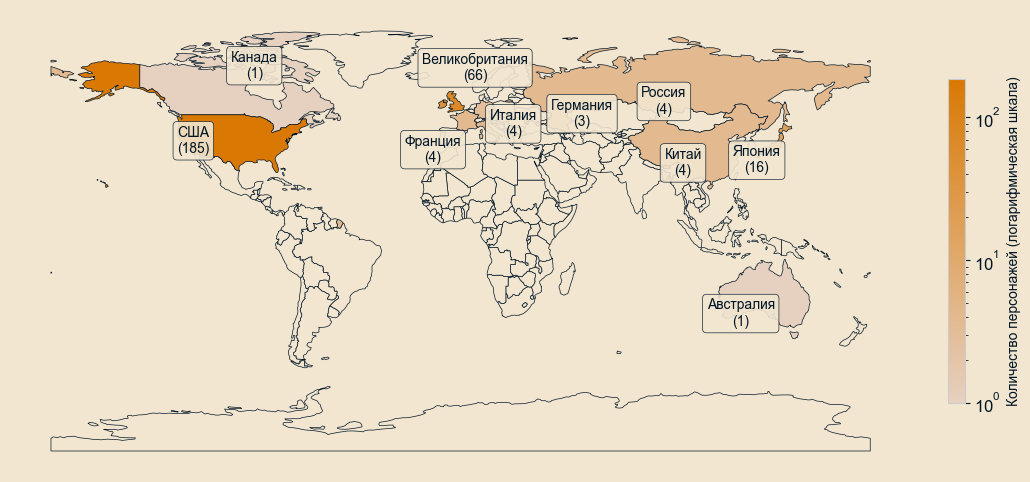

Nationality Statistics:
Countries with characters: 12
Countries without characters: 165
Total characters mapped: 349.0

Top countries with fictional names:
США: 185 characters
Великобритания: 66 characters
Ireland: 43 characters
Bhutan: 18 characters
Япония: 16 characters
Россия: 4 characters
Франция: 4 characters
Китай: 4 characters
Италия: 4 characters
Германия: 3 characters


In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm, LinearSegmentedColormap
import matplotlib.colors as colors
from adjustText import adjust_text  # For automatic label placement

# Load world map data
world = gpd.read_file('data/ne_110m_admin_0_countries.shp')  # Update the path

# Create nationality mapping (fictional to real)
country_mapping = {
    'United States': 'United States of America',
    'United Kingdom': 'United Kingdom',
    'Zheng Fa': 'China',
    'Labyrinthia': 'Ireland',
    'Borginia': 'Faroe Islands',
    'Cohdopia': 'Czech Republic',
    "Khura'in": 'Bhutan',
    # Add more mappings as needed
}

# Reverse mapping for labels (real to fictional)
reverse_country_mapping = {
    'United States of America': 'США',
    'Canada': 'Канада',
    'United Kingdom': 'Великобритания',
    'China': 'Китай',
    'Russia': 'Россия',
    'Ireland': '', 
    'Faroe Islands': 'Боргиния',
    'Czech Republic': '',
    'Bhutan': "",
    'Germany': 'Германия',
    'Japan': 'Япония',
    'Italy': 'Италия',
    'Australia': 'Австралия',
    'France': 'Франция'
}

# Process nationality data
nationality_counts = df_characters['nationality'].dropna().value_counts().reset_index()
nationality_counts.columns = ['country', 'character_count']
nationality_counts['country'] = nationality_counts['country'].map(lambda k: country_mapping.get(k, k))

# Merge with world data
world_with_data = world.merge(nationality_counts,
                             left_on='NAME',      
                             right_on='country',
                             how='left')

# Fill NaN values with 0 for countries with no characters
world_with_data['character_count'] = world_with_data['character_count'].fillna(0)

# Add fictional name column for labeling
world_with_data['fictional_name'] = world_with_data['NAME'].map(reverse_country_mapping)
world_with_data['label_name'] = world_with_data['fictional_name'].fillna(world_with_data['NAME'])

# Create the map with custom styling
fig, ax = plt.subplots(1, 1, figsize=(24, 6))
fig.patch.set_facecolor(COLORS['bg'])
ax.set_facecolor(COLORS['bg'])

# Get custom colors
zero_color = COLORS['bg']

# Create a colormap from light blue to dark blue for non-zero values
colors_non_zero = [COLORS['accent2'], COLORS['accent1']]
cmap_non_zero = LinearSegmentedColormap.from_list('custom_blues', colors_non_zero)

# Separate zero and non-zero countries
zero_countries = world_with_data[world_with_data['character_count'] == 0]
non_zero_countries = world_with_data[world_with_data['character_count'] > 0]

# Plot zero countries first (background)
if len(zero_countries) > 0:
    zero_countries.plot(color=zero_color, ax=ax, 
                       edgecolor=COLORS['fg'], linewidth=0.5)

# Plot non-zero countries with logarithmic color scale
if len(non_zero_countries) > 0:
    # Use logarithmic normalization
    vmin = max(1, non_zero_countries['character_count'].min())  # At least 1 for log scale
    vmax = non_zero_countries['character_count'].max()
    
    # Create normalization
    norm = LogNorm(vmin=vmin, vmax=vmax)
    
    # Plot with logarithmic color scale
    non_zero_plot = non_zero_countries.plot(column='character_count', 
                                           ax=ax, 
                                           cmap=cmap_non_zero,
                                           norm=norm,
                                           edgecolor=COLORS['fg'],
                                           linewidth=0.5,
                                           legend=True,
                                           legend_kwds={
                                               'shrink': 0.7,
                                               'orientation': 'vertical',
                                               'pad': 0.02,
                                               'label': 'Количество персонажей (логарифмическая шкала)'
                                           })

# Customize the colorbar if it exists
if len(non_zero_countries) > 0:
    # Get the colorbar and customize it
    cbar = ax.get_figure().get_axes()[1] if len(ax.get_figure().get_axes()) > 1 else None
    if cbar:
        cbar.tick_params(labelsize=12, colors=COLORS['fg'])
        cbar.set_label('Number of Characters (Log Scale)')

# Add country labels with automatic adjustment to avoid crowding
if len(non_zero_countries) > 0:
    texts = []
    
    # Label only countries with significant counts to avoid clutter
    significant_countries = non_zero_countries[
        (non_zero_countries['character_count'] >= 1) &
        (non_zero_countries['label_name'].map(len) != 0)
    ]
    
    for idx, row in significant_countries.iterrows():
        # Get centroid of the country
        centroid = row.geometry.centroid
        
        # Create text with fictional name if available
        label_text = f"{row['label_name']}\n({int(row['character_count'])})"
        
        text = ax.text(centroid.x, centroid.y, 
                      label_text, 
                      fontsize=10, ha='center', va='center',
                      color=COLORS['fg'], 
                      bbox=dict(boxstyle="round,pad=0.3", 
                               facecolor=COLORS['bg'], 
                               alpha=0.9, 
                               edgecolor=COLORS['fg'],
                               linewidth=0.5))
        texts.append(text)
    
    # Use adjust_text to automatically spread out overlapping labels
    try:
        adjust_text(texts, 
                   ax=ax,
                   arrowprops=dict(arrowstyle='-', color=COLORS['fg'], lw=0),
                   expand_points=(1.5, 1.5),  # Expand the no-overlap zone
                   expand_text=(1.2, 1.2),    # Expand text boxes
                   force_text=(0.5, 0.8),     # Force text movement
                   force_points=(0.5, 0.8),   # Force point movement  
                   lim=1000)                  # Maximum iterations
    except ImportError:
        print("install adjustText: pip install adjustText")
        # Fallback: manual adjustment for most crowded areas
        # Move some problematic labels manually
        pass

ax.axis('off')  # Remove axes

# plt.tight_layout()
plt.savefig('world_map_nationalities.svg', format='svg',
            bbox_inches='tight', dpi=300,
            transparent=True)
plt.show()

# Print some statistics
print("Nationality Statistics:")
print(f"Countries with characters: {len(non_zero_countries)}")
print(f"Countries without characters: {len(zero_countries)}")
print(f"Total characters mapped: {non_zero_countries['character_count'].sum()}")
print(f"\nTop countries with fictional names:")
top_countries = non_zero_countries.nlargest(10, 'character_count')[['NAME', 'fictional_name', 'character_count']]
for _, row in top_countries.iterrows():
    print(f"{row['fictional_name'] or row['NAME']}: {int(row['character_count'])} characters")

In [29]:
df_characters_alt = pd.read_csv('data/aa_characters_COPY.csv') # Updated dataset with occupation column
df_characters_alt['occupation'].notna().sum()

np.int64(219)

Occupation by Gender Distribution:
gender           MALE  FEMALE
occupation                   
CREATIVE           37      16
LEGAL              26      10
LAW_ENFORCEMENT    24       7
OTHER              17       6
SERVICE            14       7
SPIRITUAL           5      10
POLITICAL          11       3
TECHNICAL           9       3
MEDICAL             3       5
UNEMPLOYED          4       2


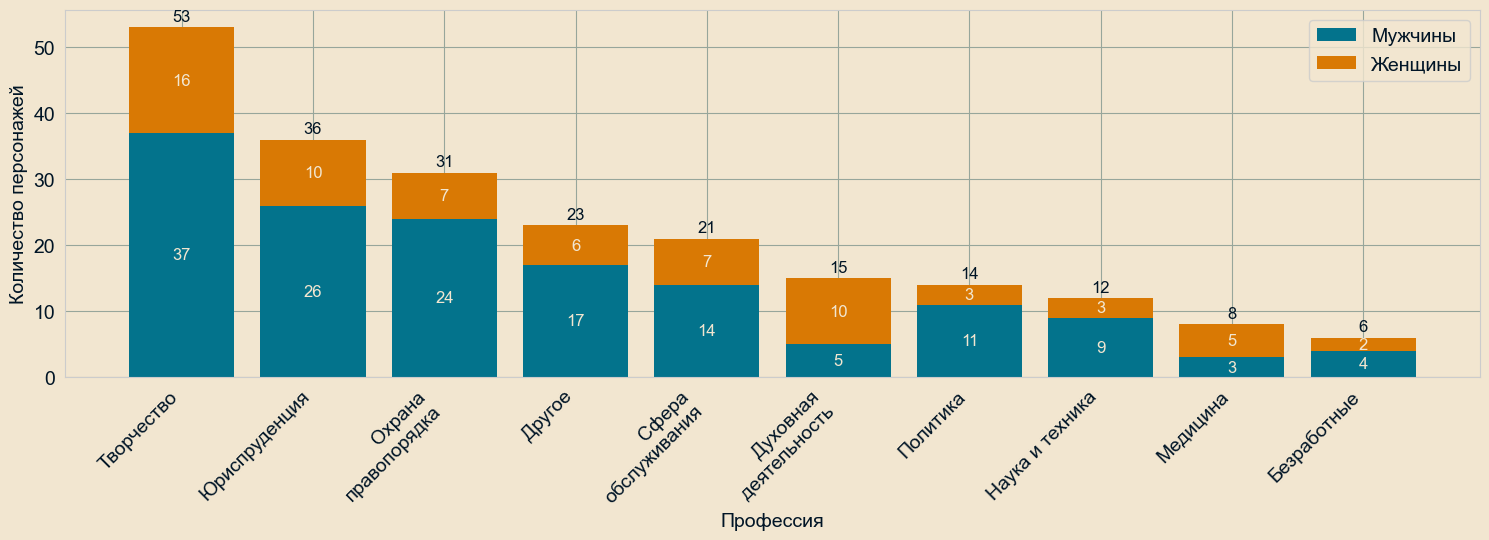


Summary:
Total characters with occupation data: 219
Male characters: 150
Female characters: 69


In [30]:
# Prepare the data for occupation visualization
occupation_gender = df_characters_alt[df_characters_alt['occupation'].notna()].groupby(['occupation', 'gender']).size().unstack(fill_value=0)

# Calculate total for sorting
occupation_gender['total'] = occupation_gender.sum(axis=1)
occupation_gender = occupation_gender.sort_values('total', ascending=False).drop('total', axis=1)

occupation_ru_remapping = {
    'POLITICAL': 'Политика',
    'LEGAL': 'Юриспруденция',
    'LAW_ENFORCEMENT': 'Охрана\nправопорядка',
    'MEDICAL': 'Медицина',
    'TECHNICAL': 'Наука и техника',
    'SERVICE': 'Сфера\nобслуживания',
    'CREATIVE': 'Творчество',
    'SPIRITUAL': 'Духовная\nдеятельность',
    'UNEMPLOYED': 'Безработные',
    'OTHER': 'Другое'
}

# Convert to the format needed for plotting
occupation_gender = occupation_gender[['MALE', 'FEMALE']]  # Ensure consistent order

print("Occupation by Gender Distribution:")
print(occupation_gender)

# Create the stacked bar chart
plt.figure(figsize=(15, 5.5))

# Set up the plot
occupations = occupation_gender.index.map(lambda k: occupation_ru_remapping.get(k, k))
x_pos = np.arange(len(occupations))

# Create stacked bars
male_bars = occupation_gender['MALE']
female_bars = occupation_gender['FEMALE']

plt.bar(x_pos, male_bars, color=COLORS['accent0'], label='Мужчины', edgecolor=COLORS['fg'], linewidth=0)
plt.bar(x_pos, female_bars, bottom=male_bars, color=COLORS['accent1'], label='Женщины', edgecolor=COLORS['fg'], linewidth=0)

# Customize the plot
plt.xticks(x_pos, occupations, rotation=45, ha='right', fontsize=14, color=COLORS["fg"])
plt.yticks(fontsize=14, color=COLORS["fg"])
plt.xlabel('Профессия', fontsize=14, color=COLORS["fg"])
plt.ylabel('Количество персонажей', fontsize=14, color=COLORS["fg"])
plt.legend(fontsize=14)

# Add value labels on bars
for i, (male, female) in enumerate(zip(male_bars, female_bars)):
    total = male + female
    # Label for male segment (if large enough)
    if male > 0:
        plt.text(i, male/2, str(int(male)), ha='center', va='center', fontsize=12, 
                color=COLORS['bg'])
    # Label for female segment (if large enough)
    if female > 0:
        plt.text(i, male + female/2, str(int(female)), ha='center', va='center', fontsize=12,
                color=COLORS['bg'])
    # Total label at top
    plt.text(i, total + 0.5, str(int(total)), ha='center', va='bottom', fontsize=12, color=COLORS['fg'])

plt.tight_layout()
plt.savefig('occupation_by_gender.svg', format='svg', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

# Print summary statistics
print(f"\nSummary:")
print(f"Total characters with occupation data: {df_characters_alt['occupation'].notna().sum()}")
print(f"Male characters: {occupation_gender['MALE'].sum()}")
print(f"Female characters: {occupation_gender['FEMALE'].sum()}")